<a href="https://colab.research.google.com/github/nalyzhang/MO/blob/main/lab3_2373_Panina_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nalyzhang","key":"ba24fba2eeab9f621e8d2840dd5e8f3d"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d valakhorasani/gym-members-exercise-dataset

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset
License(s): apache-2.0
  0% 0.00/21.6k [00:00<?, ?B/s]
100% 21.6k/21.6k [00:00<00:00, 26.1MB/s]


In [3]:
! unzip "gym-members-exercise-dataset.zip"

Archive:  gym-members-exercise-dataset.zip
  inflating: gym_members_exercise_tracking.csv  


In [50]:
import pandas as pd

df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Для начала построим гистограммы атрибутов, так как в 1 лабораторной работе был разобран другой датасет.

In [51]:
num_list = ['Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Calories_Burned_Per_Week']

def to_index(value, uniq_value):
    return uniq_value.index(value)

def categorical_to_numerical(dataframe, column):
    lists_uniq_values = sorted(list(set(dataframe[column])))
    dataframe[column] = dataframe[column].apply(lambda x: to_index(x, lists_uniq_values))

categorical_list = [x for x in df.columns if x not in num_list]

for feature in categorical_list:
    categorical_to_numerical(df, feature)

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,20,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,19,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,7,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,30,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,28,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


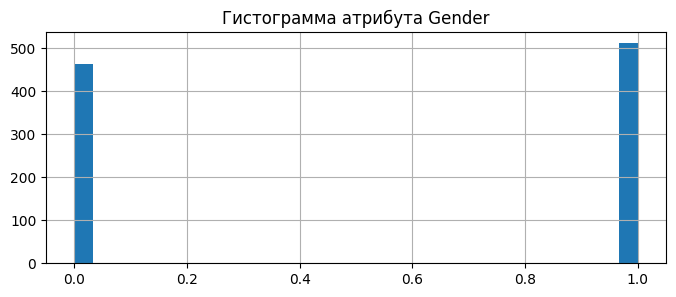

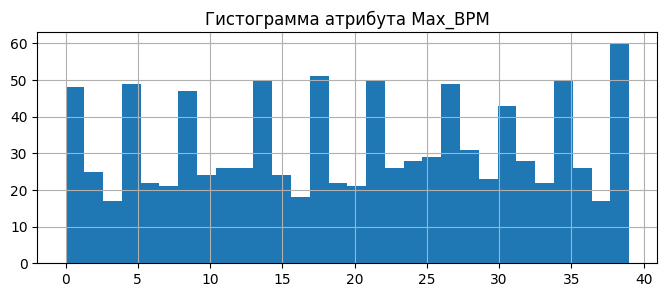

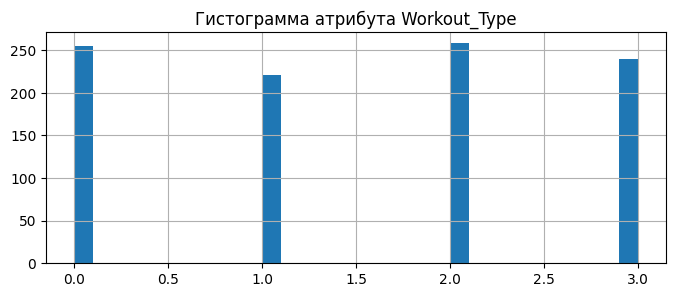

In [52]:
import matplotlib.pyplot as plt

for attribute in categorical_list:
  plt.figure(figsize=(8,3))
  plt.hist(df[attribute],bins=30)
  plt.grid(True)
  plt.title(f'Гистограмма атрибута {attribute}')

В качестве атрибута классификации выберем Gender. Классификация на 2 группы (Female, Male).

В целом, соотношение сбалансированно, разница между Female и Male незначительна.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


feature = df['Gender']
df = df.drop(columns='Gender', axis=1)

# разделение данных на обучающую и тестовую выборки
train_x, test_x, train_y, test_y = train_test_split(df, feature, test_size=0.3)

In [54]:
# kNN
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(train_x, train_y)
predictions_knn = knn_model.predict(test_x)

probs_y = knn_model.predict_proba(test_x)
# сохраняем вероятности только для положительного исхода
probs_y = probs_y[:, 1]

accuracy = accuracy_score(test_y, predictions_knn)
precision = precision_score(test_y, predictions_knn, average='weighted')
recall = recall_score(test_y, predictions_knn, average='weighted')
f1 = f1_score(test_y, predictions_knn, average='weighted')
roc = roc_auc_score(test_y, probs_y)

print('kNN:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC: {roc:.2f}')

kNN:
Accuracy: 0.77
Precision: 0.82
Recall: 0.77
F1 Score: 0.77
ROC: 0.84


In [55]:
# дерево решений
tree_model = DecisionTreeClassifier(max_depth=5, random_state=17)
tree_model.fit(train_x, train_y)
predictions_tree = tree_model.predict(test_x)
accuracy = accuracy_score(test_y, predictions_tree)

probs_y = tree_model.predict_proba(test_x)
# сохраняем вероятности только для положительного исхода
probs_y = probs_y[:, 1]

precision = precision_score(test_y, predictions_tree, average='weighted')
recall = recall_score(test_y, predictions_tree, average='weighted')
f1 = f1_score(test_y, predictions_tree, average='weighted')
roc = roc_auc_score(test_y, probs_y)

print('Decision Tree:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC: {roc:.2f}')

Decision Tree:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
ROC: 0.99


Значения метрик выше у Decision Tree, чем у kNN.

За что отвечает каждая метрика:
* Accuracy - доля правильных ответов
* Precision - доля верно положительных ответов из всех положительных ответов, данных моделью.
* Recall - доля объектов положительного класса из всех объектов положительного класса, которая была найдена моделью.
* F1 Score - среднее гармоническое precision и recall.
* ROC - площадь под кривой ошибок.

Дерево решений имеет большую точность в сравнении с методом ближайших соседей по всем вычесленным метрикам.